[*********************100%***********************]  1 of 1 completed


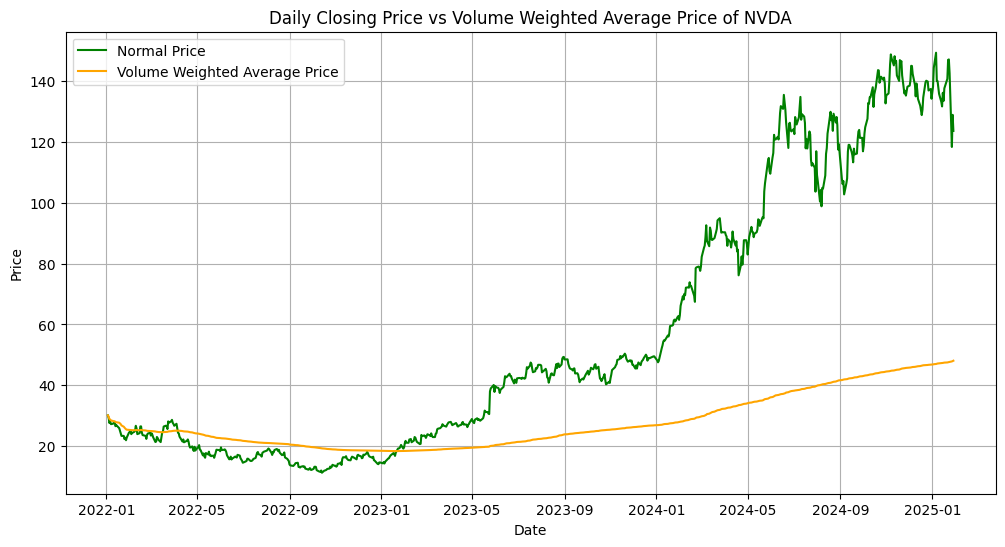

In [1]:
!pip install yfinance pandas numpy matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

ticker_widget = widgets.Text(description='Ticker:', placeholder='Enter stock ticker')
start_date_widget = widgets.Text(description='Start Date:', placeholder='YYYY-MM-DD')
end_date_widget = widgets.Text(description='End Date:', placeholder='YYYY-MM-DD')
compute_button = widgets.Button(description='Compute VWAP', button_style='success')

def compute_vwap(_):
    ticker = ticker_widget.value
    start_date = start_date_widget.value
    end_date = end_date_widget.value

    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            print("No data found. Please check your input values.")
            return

        data = data[['Close', 'Volume']]

        data['price_volume'] = data['Close'] * data['Volume']
        data['cumulative_price_volume'] = data['price_volume'].cumsum()
        data['cumulative_volume'] = data['Volume'].cumsum()
        data['VWAP'] = data['cumulative_price_volume'] / data['cumulative_volume']

        plt.figure(figsize=(12,6))
        plt.plot(data.index, data['Close'], label='Normal Price', color='green', linestyle='-')
        plt.plot(data.index, data['VWAP'], label='Volume Weighted Average Price', color='orange', linestyle='-')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title(f"Daily Closing Price vs Volume Weighted Average Price of {ticker}")
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error: {e}")

compute_button.on_click(compute_vwap)

display(widgets.VBox([ticker_widget, start_date_widget, end_date_widget, compute_button]))